# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/ML%20spring%202023/Module%2011-%20PCA/python/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Kernel PCA

In this notebook, we are going to show the application of Kernel PCA when preprocessing the data for a supervised learning model. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


Let's work with age and Estimated salary from the feature space.

In [4]:
df= df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


###  Logistic regressions  (number of features = 2 for visualization purpose)

Let's work with age and Estimated salary from the feature space.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [6]:
y = df['Purchased']
X = df.drop('Purchased', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [7]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = rand_state)
logistic.fit(X_train, y_train)

# Predicting the Test set results
y_pred_test = logistic.predict(X_test)

### Applying Kernel PCA

In [13]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
PC_train= kpca.fit_transform(X_train)
PC_test=  kpca.transform(X_test)

we can find the PVE as below: 

In [22]:
from numpy import linalg
cov= np.cov(X_train.T) # exact covariance of data. 
eigval , eigvec = linalg.eig(cov)

In [24]:
eigval/eigval.sum()

array([0.58528057, 0.41471943])

In [16]:
# or alternatively, 
var = np.var(PC_train, axis=0)
var / var.sum()

array([0.52019858, 0.47980142])

In [9]:
# Fitting Logistic Regression to the Training set
logistic.fit(PC_train, y_train)

# Predicting the Test set results
y_PC_pred_test = logistic.predict(PC_test)

### the Confusion Matrix 

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
print(classification_report(y_train, logistic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       209
           1       0.62      0.72      0.67       111

    accuracy                           0.75       320
   macro avg       0.73      0.75      0.74       320
weighted avg       0.76      0.75      0.76       320



In [12]:
print(classification_report(y_train, logistic.predict(PC_train)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       209
           1       0.82      0.79      0.81       111

    accuracy                           0.87       320
   macro avg       0.86      0.85      0.85       320
weighted avg       0.87      0.87      0.87       320



### Let's see the classifiers in two cases:
1. Original space + logistic regression (Linear Classifier)
2. Kernel PC space + logistic regression (Linear classifier)



### 1. Original space + logistic regression (Linear Classifier)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


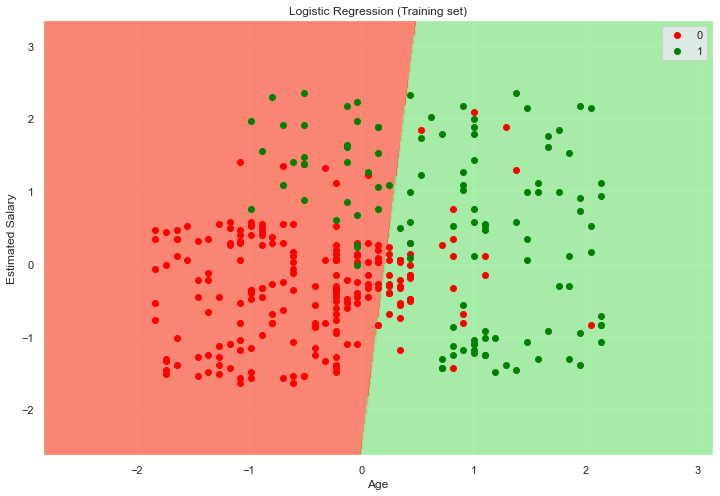

In [ ]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


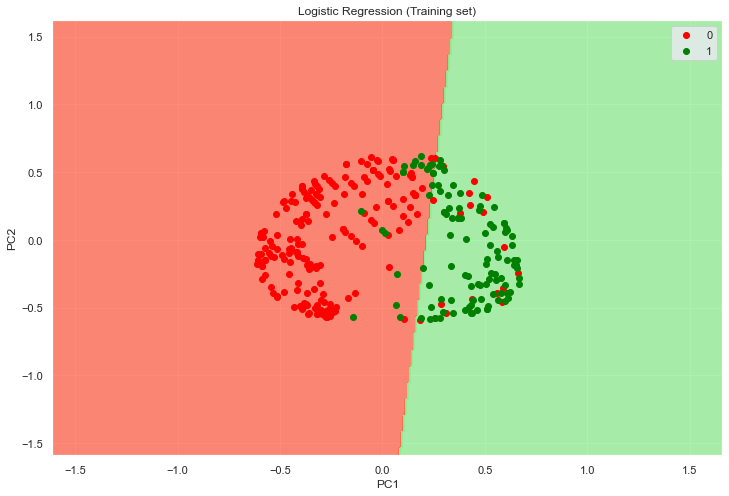

In [ ]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = PC_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Let's see the performance of the models in the test set! this is what that matters. 


In [28]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        48
           1       0.83      0.75      0.79        32

    accuracy                           0.84        80
   macro avg       0.84      0.82      0.83        80
weighted avg       0.84      0.84      0.84        80



In [29]:
print(classification_report(y_test, logistic.predict(PC_test)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        48
           1       0.83      0.59      0.69        32

    accuracy                           0.79        80
   macro avg       0.80      0.76      0.76        80
weighted avg       0.79      0.79      0.78        80



Oooops! eventhough we were excited about the performance of Kernel PCA model in the train set, however, it is underpeforming in the test set. So I would not do the Kernel PCA transformation for this exercise. 

###  Additional links:
1. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. PCA visualization: https://setosa.io/ev/principal-component-analysis/
3. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
4. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
5. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk